### Stock Market Prediction Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [41]:
### Data Collection
# !python -m pip install pandas_datareader
import pandas_datareader as pdr
key="7a22edc54a3cdb9be75ee6ae6ae28ed3b86521f0"

In [42]:
df = pdr.get_data_tiingo('IBN', api_key=key)

C:\Users\DELL\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [43]:
df.to_csv('IBN.csv')

In [44]:
import pandas as pd

In [45]:
df=pd.read_csv('IBN.csv')

In [46]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,IBN,2017-06-23 00:00:00+00:00,9.04,9.06,8.970,8.98,7052956,8.949423,8.969223,8.880124,8.890024,7052956,0.0,1.0
1,IBN,2017-06-26 00:00:00+00:00,9.08,9.08,9.020,9.02,6164449,8.989022,8.989022,8.929623,8.929623,6164449,0.0,1.0
2,IBN,2017-06-27 00:00:00+00:00,9.01,9.01,8.890,8.93,17793077,8.919724,8.919724,8.800926,8.840525,17793077,0.0,1.0
3,IBN,2017-06-28 00:00:00+00:00,9.06,9.13,8.945,9.04,7923422,8.969223,9.038521,8.855375,8.949423,7923422,0.0,1.0
4,IBN,2017-06-29 00:00:00+00:00,8.89,9.11,8.830,9.08,5722059,8.800926,9.018722,8.741527,8.989022,5722059,0.0,1.0


In [47]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,IBN,2022-06-14 00:00:00+00:00,17.44,17.52,17.260,17.30,5663702,17.44,17.52,17.260,17.30,5663702,0.0,1.0
1253,IBN,2022-06-15 00:00:00+00:00,17.76,17.90,17.525,17.57,8045931,17.76,17.90,17.525,17.57,8045931,0.0,1.0
1254,IBN,2022-06-16 00:00:00+00:00,17.11,17.34,17.070,17.28,10413790,17.11,17.34,17.070,17.28,10413790,0.0,1.0
1255,IBN,2022-06-17 00:00:00+00:00,17.41,17.54,17.265,17.42,18873937,17.41,17.54,17.265,17.42,18873937,0.0,1.0
1256,IBN,2022-06-21 00:00:00+00:00,18.01,18.10,17.660,17.73,7136141,18.01,18.10,17.660,17.73,7136141,0.0,1.0


In [48]:
df1=df.reset_index()['close']

In [49]:
df1

0        9.04
1        9.08
2        9.01
3        9.06
4        8.89
        ...  
1252    17.44
1253    17.76
1254    17.11
1255    17.41
1256    18.01
Name: close, Length: 1257, dtype: float64

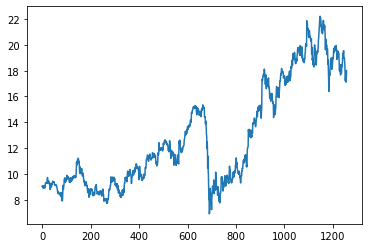

In [50]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [51]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [52]:
import numpy as np

In [53]:
df1

0        9.04
1        9.08
2        9.01
3        9.06
4        8.89
        ...  
1252    17.44
1253    17.76
1254    17.11
1255    17.41
1256    18.01
Name: close, Length: 1257, dtype: float64

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [55]:
df1

array([[0.13968668],
       [0.14229765],
       [0.13772846],
       ...,
       [0.66644909],
       [0.68603133],
       [0.72519582]])

In [56]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [57]:
training_size,test_size

(817, 440)

In [58]:
train_data

array([[0.13968668],
       [0.14229765],
       [0.13772846],
       [0.14099217],
       [0.12989556],
       [0.13511749],
       [0.13511749],
       [0.14164491],
       [0.13511749],
       [0.13381201],
       [0.13642298],
       [0.1305483 ],
       [0.14295039],
       [0.15078329],
       [0.15796345],
       [0.15861619],
       [0.15796345],
       [0.15665796],
       [0.15469974],
       [0.15469974],
       [0.16775457],
       [0.17232376],
       [0.18407311],
       [0.16840731],
       [0.15469974],
       [0.1573107 ],
       [0.16253264],
       [0.16644909],
       [0.15339426],
       [0.15274151],
       [0.1573107 ],
       [0.14817232],
       [0.13968668],
       [0.12336815],
       [0.1305483 ],
       [0.13381201],
       [0.13903394],
       [0.154047  ],
       [0.13772846],
       [0.13968668],
       [0.15143603],
       [0.15078329],
       [0.15926893],
       [0.16253264],
       [0.16579634],
       [0.1618799 ],
       [0.16253264],
       [0.161

In [59]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [60]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [61]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [62]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [63]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [64]:
### Create the Stacked LSTM model
# !python -m pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 19s 576ms/step - loss: 0.0217 - val_loss: 0.1083
Epoch 2/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0062 - val_loss: 0.0143
Epoch 3/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0038 - val_loss: 0.0151
Epoch 4/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0029 - val_loss: 0.0086
Epoch 5/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0026 - val_loss: 0.0043
Epoch 6/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0023 - val_loss: 0.0064
Epoch 7/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 9/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0016 - val_loss: 0.0228
Epoch 10/100
12/12 [==============================] - 3s 274ms/step - loss: 0.0022 - val_l

12/12 [==============================] - 3s 284ms/step - loss: 4.6515e-04 - val_loss: 0.0024
Epoch 80/100
12/12 [==============================] - 3s 229ms/step - loss: 5.1299e-04 - val_loss: 0.0011
Epoch 81/100
12/12 [==============================] - 3s 249ms/step - loss: 4.6648e-04 - val_loss: 0.0016
Epoch 82/100
12/12 [==============================] - 3s 259ms/step - loss: 4.5481e-04 - val_loss: 9.8157e-04
Epoch 83/100
12/12 [==============================] - 3s 244ms/step - loss: 4.4152e-04 - val_loss: 0.0038
Epoch 84/100
12/12 [==============================] - 3s 228ms/step - loss: 4.6930e-04 - val_loss: 8.5740e-04
Epoch 85/100
12/12 [==============================] - 3s 257ms/step - loss: 4.2224e-04 - val_loss: 9.8067e-04
Epoch 86/100
12/12 [==============================] - 3s 263ms/step - loss: 4.4782e-04 - val_loss: 0.0018
Epoch 87/100
12/12 [==============================] - 3s 252ms/step - loss: 4.1043e-04 - val_loss: 8.5344e-04
Epoch 88/100
12/12 [=======================

In [69]:
import tensorflow as tf

In [70]:
tf.__version__

'2.9.1'

In [71]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 52ms/step


In [72]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [73]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10.436359843679464

In [74]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

18.007445900714117

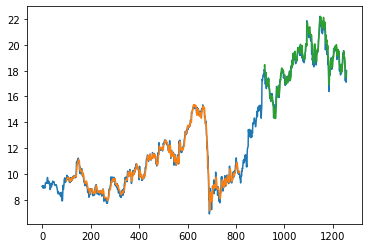

In [75]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [76]:
len(test_data)

440

In [77]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [78]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [79]:
temp_input

[0.9216710182767625,
 0.9680156657963448,
 0.9784595300261099,
 0.9784595300261099,
 0.9510443864229765,
 0.956266318537859,
 0.9321148825065275,
 0.9464751958224542,
 0.951697127937337,
 0.9203655352480418,
 0.8988250652741516,
 0.8302872062663187,
 0.885117493472585,
 0.866187989556136,
 0.8368146214099217,
 0.8492167101827677,
 0.8550913838120104,
 0.8309399477806789,
 0.8054830287206265,
 0.8368146214099217,
 0.8204960835509139,
 0.7571801566579635,
 0.7800261096605745,
 0.7395561357702352,
 0.689295039164491,
 0.6194516971279374,
 0.6462140992167102,
 0.7180156657963446,
 0.7023498694516972,
 0.6990861618798956,
 0.731070496083551,
 0.7473890339425588,
 0.7767624020887729,
 0.7800261096605745,
 0.7885117493472587,
 0.768276762402089,
 0.7878590078328982,
 0.7317232375979112,
 0.7415143603133161,
 0.7369451697127938,
 0.7610966057441253,
 0.7832898172323759,
 0.7904699738903396,
 0.7859007832898173,
 0.804177545691906,
 0.8368146214099217,
 0.816579634464752,
 0.8211488250652743,
 

In [84]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=98
i=0
while(i<30):
    
    if(len(temp_input)>98):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.96801567 0.97845953 0.97845953 0.95104439 0.95626632 0.93211488
 0.9464752  0.95169713 0.92036554 0.89882507 0.83028721 0.88511749
 0.86618799 0.83681462 0.84921671 0.85509138 0.83093995 0.80548303
 0.83681462 0.82049608 0.75718016 0.78002611 0.73955614 0.68929504
 0.6194517  0.6462141  0.71801567 0.70234987 0.69908616 0.7310705
 0.74738903 0.7767624  0.78002611 0.78851175 0.76827676 0.78785901
 0.73172324 0.74151436 0.73694517 0.76109661 0.78328982 0.79046997
 0.78590078 0.80417755 0.83681462 0.81657963 0.82114883 0.82180157
 0.84725849 0.84203655 0.83550914 0.83681462 0.8348564  0.82571802
 0.85182768 0.83616188 0.83159269 0.78133159 0.81788512 0.79634465
 0.79765013 0.82375979 0.7924282  0.80221932 0.81396867 0.81462141
 0.78002611 0.7578329  0.7232376  0.74804178 0.73629243 0.71671018
 0.70300261 0.70561358 0.75522193 0.71605744 0.71214099 0.7310705
 0.75391645 0.74608355 0.76436031 0.78916449 0.81331593 0.80613577
 0.81266319 0.82571802 0.79438642 0.78785901 0.78851

7 day output [[0.7252936]]
8 day input [0.92036554 0.89882507 0.83028721 0.88511749 0.86618799 0.83681462
 0.84921671 0.85509138 0.83093995 0.80548303 0.83681462 0.82049608
 0.75718016 0.78002611 0.73955614 0.68929504 0.6194517  0.6462141
 0.71801567 0.70234987 0.69908616 0.7310705  0.74738903 0.7767624
 0.78002611 0.78851175 0.76827676 0.78785901 0.73172324 0.74151436
 0.73694517 0.76109661 0.78328982 0.79046997 0.78590078 0.80417755
 0.83681462 0.81657963 0.82114883 0.82180157 0.84725849 0.84203655
 0.83550914 0.83681462 0.8348564  0.82571802 0.85182768 0.83616188
 0.83159269 0.78133159 0.81788512 0.79634465 0.79765013 0.82375979
 0.7924282  0.80221932 0.81396867 0.81462141 0.78002611 0.7578329
 0.7232376  0.74804178 0.73629243 0.71671018 0.70300261 0.70561358
 0.75522193 0.71605744 0.71214099 0.7310705  0.75391645 0.74608355
 0.76436031 0.78916449 0.81331593 0.80613577 0.81266319 0.82571802
 0.79438642 0.78785901 0.78851175 0.77088773 0.75391645 0.71801567
 0.67362924 0.68798956 0.7

15 day output [[0.74296147]]
16 day input [0.83093995 0.80548303 0.83681462 0.82049608 0.75718016 0.78002611
 0.73955614 0.68929504 0.6194517  0.6462141  0.71801567 0.70234987
 0.69908616 0.7310705  0.74738903 0.7767624  0.78002611 0.78851175
 0.76827676 0.78785901 0.73172324 0.74151436 0.73694517 0.76109661
 0.78328982 0.79046997 0.78590078 0.80417755 0.83681462 0.81657963
 0.82114883 0.82180157 0.84725849 0.84203655 0.83550914 0.83681462
 0.8348564  0.82571802 0.85182768 0.83616188 0.83159269 0.78133159
 0.81788512 0.79634465 0.79765013 0.82375979 0.7924282  0.80221932
 0.81396867 0.81462141 0.78002611 0.7578329  0.7232376  0.74804178
 0.73629243 0.71671018 0.70300261 0.70561358 0.75522193 0.71605744
 0.71214099 0.7310705  0.75391645 0.74608355 0.76436031 0.78916449
 0.81331593 0.80613577 0.81266319 0.82571802 0.79438642 0.78785901
 0.78851175 0.77088773 0.75391645 0.71801567 0.67362924 0.68798956
 0.70887728 0.66644909 0.68603133 0.72519582 0.72642922 0.73324972
 0.73432153 0.732939

23 day output [[0.763923]]
24 day input [0.6194517  0.6462141  0.71801567 0.70234987 0.69908616 0.7310705
 0.74738903 0.7767624  0.78002611 0.78851175 0.76827676 0.78785901
 0.73172324 0.74151436 0.73694517 0.76109661 0.78328982 0.79046997
 0.78590078 0.80417755 0.83681462 0.81657963 0.82114883 0.82180157
 0.84725849 0.84203655 0.83550914 0.83681462 0.8348564  0.82571802
 0.85182768 0.83616188 0.83159269 0.78133159 0.81788512 0.79634465
 0.79765013 0.82375979 0.7924282  0.80221932 0.81396867 0.81462141
 0.78002611 0.7578329  0.7232376  0.74804178 0.73629243 0.71671018
 0.70300261 0.70561358 0.75522193 0.71605744 0.71214099 0.7310705
 0.75391645 0.74608355 0.76436031 0.78916449 0.81331593 0.80613577
 0.81266319 0.82571802 0.79438642 0.78785901 0.78851175 0.77088773
 0.75391645 0.71801567 0.67362924 0.68798956 0.70887728 0.66644909
 0.68603133 0.72519582 0.72642922 0.73324972 0.73432153 0.73293942
 0.73038661 0.72780472 0.72598004 0.72529358 0.72579074 0.72729331
 0.72951388 0.73215026 0

In [94]:
day_new=np.arange(1,98)
day_pred=np.arange(98,128)

In [95]:
import matplotlib.pyplot as plt

In [96]:
len(df1)

1257

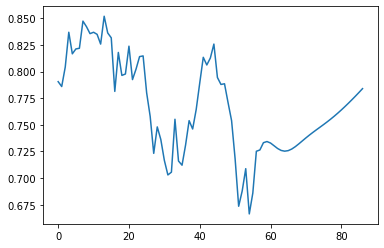

In [98]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [99]:
df3=scaler.inverse_transform(df3).tolist()

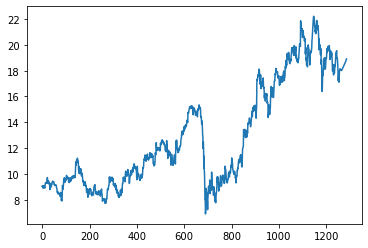

In [100]:
plt.plot(df3)